In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/big_project/문욱000_1200_최근.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1566 entries, 0 to 1565
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   콘텐츠명               1566 non-null   object 
 1   구명                 1566 non-null   object 
 2   새주소[도로명 주소]        1522 non-null   object 
 3   지번주소               857 non-null    object 
 4   좌표[X]              1566 non-null   float64
 5   좌표[Y]              1566 non-null   float64
 6   전화번호               1433 non-null   object 
 7   주요시설               28 non-null     object 
 8   중분류                1566 non-null   object 
 9   대분류                1566 non-null   object 
 10  실내_실외              1566 non-null   object 
 11  시군                 602 non-null    object 
 12  키워드                596 non-null    object 
 13  웹URL               926 non-null    object 
 14  키즈메뉴(아이가먹을수있는 메뉴)  569 non-null    object 
 15  유아용품               570 non-null    object 
 16  영업시간               568 n

# **도로명주소 => 좌표 변환**

In [ ]:
# 카카오API를 사용하여 주소->좌표 변환
import requests, json

def get_location(address):
  url = 'https://dapi.kakao.com/v2/local/search/address.json?query=' + address
  # 'KaKaoAK '는 그대로 두시고 개인키만 지우고 입력해 주세요.
  # ex) KakaoAK 6af8d4826f0e56c54bc794fa8a294
  headers = {"Authorization": "KakaoAK 5d94b8febe080e78922d5b90f469b0e8"}
  api_json = json.loads(str(requests.get(url,headers=headers).text))
  address = api_json['documents'][0]['address']
  crd = {"lat": str(address['y']), "lng": str(address['x'])}
  address_name = address['address_name']

  return crd

crd = get_location("서울 강북구 번동 산 12")
print(crd)

{'lat': '37.6323709926565', 'lng': '127.032184757349'}


In [ ]:
# NaN 값을 '주소없음'으로 대체
df['새주소[도로명 주소]'] = df['새주소[도로명 주소]'].fillna('주소없음')

In [ ]:
df.loc[1, '좌표[X]']

127.154278812

In [ ]:
import numpy as np
a = df['새주소[도로명 주소]']
b = df['지번주소']

for i, adr in enumerate(a):
    try:
        if adr != '주소없음':
            crd = get_location(adr)
            df.loc[i, '좌표[X]'] = crd['lng']
            df.loc[i, '좌표[Y]'] = crd['lat']
        else:
            adress = b[i]
            crd = get_location(adress)
            df.loc[i, '좌표[X]'] = crd['lng']
            df.loc[i, '좌표[Y]'] = crd['lat']
    except:
        print(f"{i}번째 에서 오류")




63번째 에서 오류
73번째 에서 오류
779번째 에서 오류
1080번째 에서 오류


63번째 에서 오류 : 서울 강북구 번동 산 12

---


73번째 에서 오류 : 서울특별시 송파구 오금동 51

---


779번째 에서 오류 : 서울특별시 용산구 한강로3가 40-999

---


1080번째 에서 오류 : 서울 송파구 신천동 14

In [ ]:
a[63], b[63]

('주소없음', '서울특별시 강북구 번동 산 17-14')

In [ ]:
crd = get_location("서울 강북구 번동 산 12")
print(crd)

{'lat': '37.6323709926565', 'lng': '127.032184757349'}


****** 좌표 수정작업 **********

In [ ]:
crd = get_location("서울 강북구 번동 산 12")

df.loc[63, '좌표[X]'] = crd['lng']
df.loc[63, '좌표[Y]'] = crd['lat']

In [ ]:
df.iloc[63]

콘텐츠명                                                         오동 유아숲체험원
구명                                                                 강북구
새주소[도로명 주소]                                                       주소없음
지번주소                                              서울특별시 강북구 번동 산 17-14
좌표[X]                                                 127.032184757349
좌표[Y]                                                 37.6323709926565
전화번호                                                       02-901-6953
주요시설                        데크놀이대, 밧줄놀이대, 흙놀이장, 숲속놀이대, 나무공작소, 자작나무쉼터 등
중분류                                                                숲체험
대분류                                                                 놀기
실내_실외                                                               실외
시군                                                                 NaN
키워드                                                                NaN
웹URL                                                               NaN
키즈메뉴(아

In [ ]:
# df.to_csv('df좌표수정.csv', index=False)

# **지도 시각화**

In [ ]:
import folium

map_folium = folium.Map(location=[crd['lat'],crd['lng']], zoom_start=12, width=750, height=500,)
folium.Marker(location=[crd['lat'],crd['lng']], icon=folium.Icon(color='green', icon='flag')).add_to(map_folium)
display(map_folium)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# # 좌표[X] 열의 값을 float 형식으로 변환
# df['좌표[X]'] = pd.to_numeric(df['좌표[X]'], errors='coerce')
df['좌표[X]'] = df['좌표[X]'].astype(float)
# # 좌표[Y] 열의 값을 float 형식으로 변환
# df['좌표[Y]'] = pd.to_numeric(df['좌표[Y]'], errors='coerce')
df['좌표[Y]'] = df['좌표[Y]'].astype(float)

In [ ]:
df.to_csv('df좌표수정완료.csv', index=False)

In [ ]:
df['좌표[Y]'].isnull().sum()

0

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51340 (\N{HANGUL SYLLABLE JWA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54364 (\N{HANGUL SYLLABLE PYO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51340 (\N{HANGUL SYLLABLE JWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54364 (\N{HANGUL SYLLABLE PYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


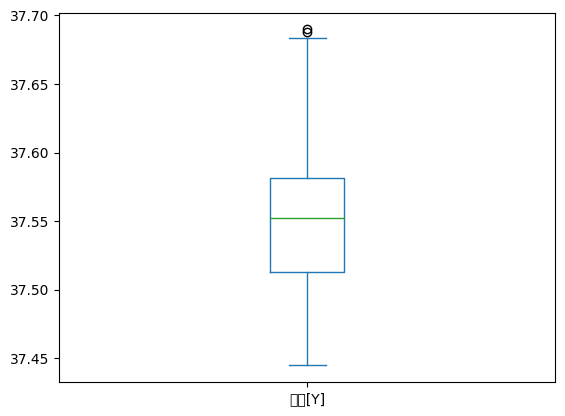

In [ ]:
df['좌표[Y]'].plot(kind = 'box')

In [ ]:
df['좌표[X]'].max()

127.174117962328